# 

# Intro to Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Regression

### Data

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset


Features:

* `age`: age in years
* `sex`
* `bmi`: body mass index
* `bp`: average blood pressure
* `s1`: tc, total serum cholesterol
* `s2`: ldl, low-density lipoproteins
* `s3`: hdl, high-density lipoproteins
* `s4`: tch, total cholesterol / HDL
* `s5`: ltg, possibly log of serum triglycerides level
* `s6`: glu, blood sugar level

Target:

* Quantitative measure of disease progression one year after baseline

In [118]:
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets, utils

In [119]:
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 0.24.1

1.2.2


#### Data loading

In [120]:
diabetes = datasets.load_diabetes(scaled=False)

In [121]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [122]:
# utils.Bunch?

In [123]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [124]:
type(diabetes.data)

numpy.ndarray

In [125]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [126]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### Selection of training data

Load data in a pandas `DataFrame` and select `s3` as single feature for prediction, and `target` as target into NumPy arrays named `xs` and `ys`, respectively.

Note: Expected shapes for features and labels (target values):

![](img/05.02-samples-features.png)

<span style="color:red">Implement your solution below</span>

In [127]:
FTS = ["s3"]

In [128]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df["target"] = diabetes.target
xs = df[FTS].values
ys = df.target
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


#### Plot the feature against the target

Using Matplotlib, Seaborn, or the Matplotlib pandas' API:

<span style="color:red">Implement your solution below</span>

<Axes: xlabel='s3', ylabel='target'>

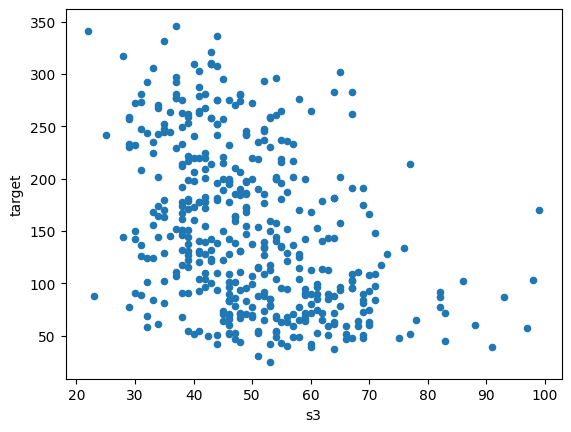

In [129]:
df.plot.scatter(x="s3",y="target")

##### Random selection of training and test sets

<span style="color:red">Implement your solution below</span>

In [130]:
from sklearn.model_selection import train_test_split
train_xs, test_xs, train_ys, test_ys = train_test_split(xs, ys)

### Training

<span style="color:red">Implement your solution below</span>

In [131]:
# 1. Model choice (import)
#from sklearn import svm
#clf =  svm.SVC(gamma=1000, C=10000.,kernel='rbf')

from sklearn import linear_model

# 2. Instantiation
clf = linear_model.LinearRegression()

# 3. Learn (fit) the model
clf.fit(train_xs, train_ys)

# 4. Predict on new data
predic = clf.predict(test_xs)

### Results

#### Plots

<span style="color:red">Implement your solution below</span>

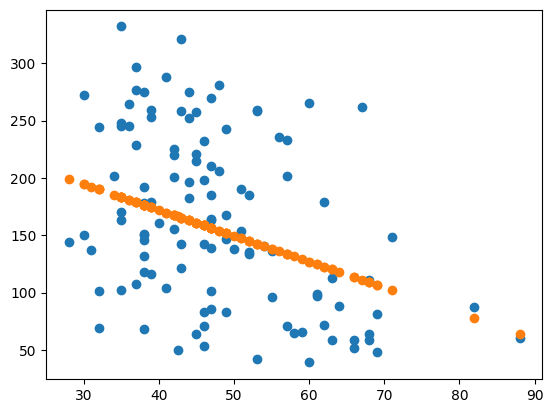

In [132]:
plt.scatter(test_xs,test_ys)
plt.scatter(test_xs,predic)

#### Evaluations

* [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)
* [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

<span style="color:red">Implement your solution below</span>

In [133]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("Mean : ",mean_absolute_error(test_ys, predic))
print("R² : ",r2_score(test_ys, predic))


Mean :  57.945790885753446
R² :  0.14746246610700808


### Non-linear approaches

* Adapt linear regression by transforming data according to basis functions
* E.g., with a polynomial projection:
    $$\hat{y} = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$$
* Note that this is still a linear model
* It is linear in the sense that we never multiply or divide the coefficients
* The one-dimensional descriptor $x$ is projected in one or more dimensions to allow modeling more complex relations between $x$ and $y$

Look up [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for more details.

<span style="color:red">Implement your solution below</span>

In [142]:
DEG = 3
# def apply_basis(arr,deg=2):
#     """Return the basis [1, x, x^2, x^3] applied to the elements of arr an array of arrays"""
#     return np.hstack([arr**i for i in range(1, deg+1)])
# #apply_basis([1,2,3,4,5,6,7,8,9,10])
# #apply_basis(train_xs)[0]

### Training

<span style="color:red">Implement your solution below</span>

In [145]:
# 1. Model choice (import)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 2. Instantiation
clf_poly = make_pipeline(PolynomialFeatures(degree=DEG),LinearRegression())

# 3. Learn (fit) the model
clf_poly.fit(train_xs, train_ys)

# 4. Predict on new data
predic_poly = clf_poly.predict(test_xs)

#### Plots

Construction of an `array` with increasing values that extend from the lower and upper bounds of the data to produce the result of the regression on the graph.

<span style="color:red">Implement your solution below</span>

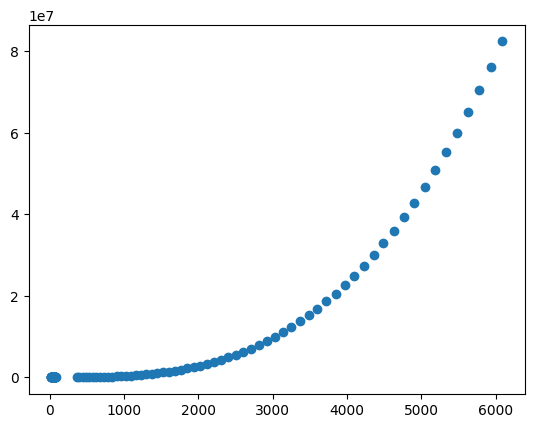

In [139]:
HOP = 1

# The limit values of the features' 1st column
MIN = np.min(diabetes.data[:,0])
MAX = np.max(diabetes.data[:,0])

# The array that spans the amplitude of data of diabetes values (with steps of size HOP)
X = np.arange(MIN, MAX, HOP)

# Concatenation of the selected feature and its squared version
X = np.c_[X, X**2].reshape(-1, 1)

# Prediction using the model to produce the regression
Y = clf_poly.predict(X)

plt.scatter(X,Y)

#### Evaluations

<span style="color:red">Implement your solution below</span>

Print coefficients $a_0$ to $a_{\text{DEG}}$ from the regression, as in:

$$\hat{y}^{(i)} = a_0 + a_1 x_1^{(i)} + a_2 x_2^{(i)}$$

In [137]:
print("a_0={:.4f} a_1 = {:.4f}, a_2 = {:.4f} a_3 = {:.4f}".format(*clf_poly.named_steps["linearregression"].coef_))

a_0=0.0000 a_1 = -1.9459, a_2 = -0.0358 a_3 = 0.0004


## Further assignment

#### Goal: Try to improve the result of the linear regression

*   Perform the linear regression again using the set of features proposed, instead of just one. 
    The selection is made from the stage:
    [Selection of training data](#Selection-of-training-data)

*   Generate other features by taking, for example, the square of their values, 
    to take into account the non-linearity of the relations

*   Evaluate the performance of the regression in terms of MSE and $R^2$

*   Identify the features that seem the most significant for this regression, 
    by observing the value of their respective parameter ($a_j$ via `model.coef_`)

*   Comment succinctly

*   Note that visualization poses a problem when using more than one descriptor 
    (more than 2 in particular), so it is not required for this part

<span style="color:red">Implement your solution below</span>

---